# Regression 

## Introduction: $_{[3]}$
The insurer needs access to previous data to estimate each user's medical expenses in order to create the best medical insurance packages.  A medical insurer can use this information to plan a specific insurance outcome, manage large portfolios, or create more accurate pricing models.  Accurately estimating insurance costs is the goal in each of these situations.


## Dataset: $_{[3,2]}$
1,339 medical insurance records are included in this dataset.  The **target** variable **charges** are the individual medical expenses that are invoiced by health insurance; the remaining columns include personal data, like age, gender, family status, and if the patient smokes, among other characteristics.

**Columns**
- `age`: age of primary beneficiary
- `sex`: insurance contractor gender, female, male
- `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- `children`: Number of children covered by health insurance / Number of dependents
- `smoker`: Smoking
- `region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- `charges`: Individual medical costs billed by health insurance => This is my target.

In [4]:
import pandas as pd
import numpy as np

In [5]:
insurance=pd.read_csv('./Dataset/insurance.csv')

---
Next will show the first 5 samples in the dataset

In [7]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---
Show the last 5 samples in the dataset

In [9]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


---
the dataset have a `1338 sample` each sample have a `7 features`.

In [11]:
insurance.shape

(1338, 7)

---
We have to check if our dataset have a `null` values.

In [13]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there is no `null` values so we will not drop a column

---

Now we will describe the dataset

In [16]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


----
We will observe here the data type for each feature; and each non numeric values we have to encode it into a numeric form to be understandable for our model.

In [18]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [19]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

---
`pd.get_dummies()` is a Pandas function used to convert categorical variables into dummy/indicator variables (also known as one-hot encoding).

It creates new binary columns for each category (e.g., `sex_male`, `smoker_yes`, `region_northwest`, etc.).

`columns=catColumns` tells it to apply this transformation only to the `sex`, `smoker`, and `region` columns.

`drop_first=True` avoids the dummy variable trap (multicollinearity in regression) by dropping the first category of each column. For example:

Instead of creating both `sex_female` and `sex_male`, it might only create `sex_male`. If `sex_male` is 0, it means the person is female.

Similarly, it drops the first value for each categorical column.

region has four categories: `southeast`, `southwest`, `northwest`, and `northeast`. So `get_dummies()` creates one column for each category

In [21]:
catColumns = ['sex', 'smoker', 'region']
insurance_dum = pd.get_dummies(insurance, columns = catColumns, drop_first=True)
insurance_dum.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


----
### Data visualization $_{[1]}$

----

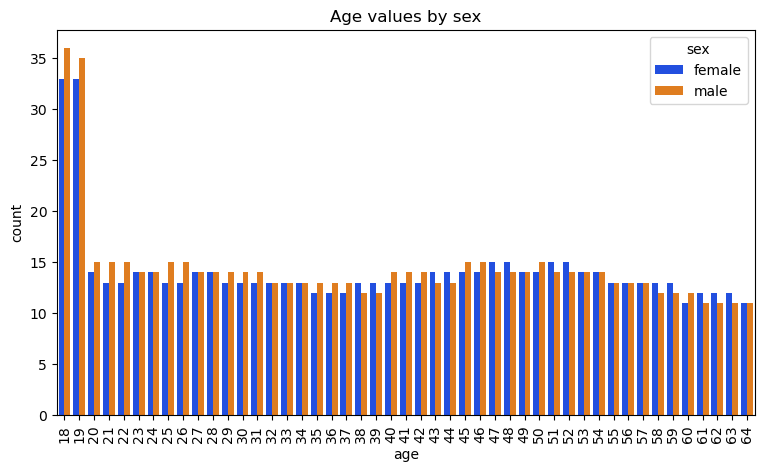

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('bright')
plt.figure(figsize=(9,5))
sns.countplot(x='age',hue='sex' ,data=insurance)
plt.title('Age values by sex')
plt.xticks(rotation=90)
plt.show()

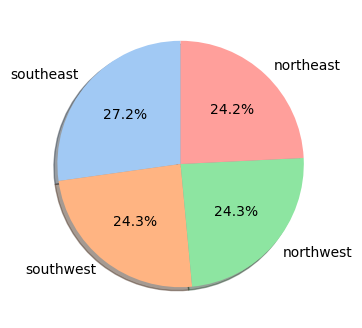

In [25]:
region=insurance['region'].value_counts()

labels=region.index
sizes=region.values
plt.figure(figsize=(6,4))
colors=sns.color_palette('pastel')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90)
plt.show()

---

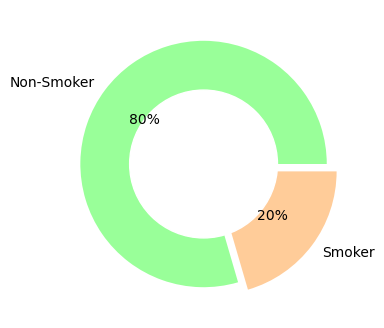

In [27]:
plt.figure(figsize=(6,4))
labels=['Non-Smoker','Smoker']
size=insurance['smoker'].value_counts()
colors=['#99ff99','#ffcc99']
explode=(0,0.1)
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%2.f%%')
circle = plt.Circle( (0,0),0.6, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

---

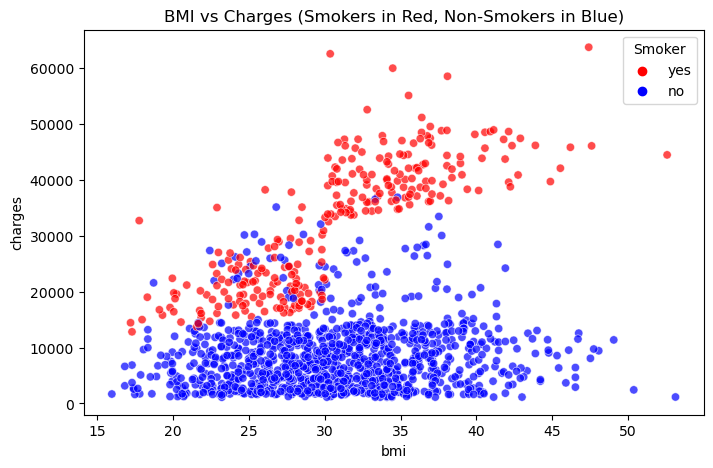

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a scatter plot with color based on 'smoker'
sns.scatterplot(
    x='bmi', 
    y='charges', 
    hue='smoker',  # Color points by smoker status
    palette={'yes': 'red', 'no': 'blue'},  # Map 'yes' to red, 'no' to blue
    data=insurance,
    alpha=0.7  # Slightly transparent for better visibility
)

# Add title and adjust legend
plt.title('BMI vs Charges (Smokers in Red, Non-Smokers in Blue)')
plt.legend(title='Smoker')  # Show legend with title

plt.show()

---
### find outliers

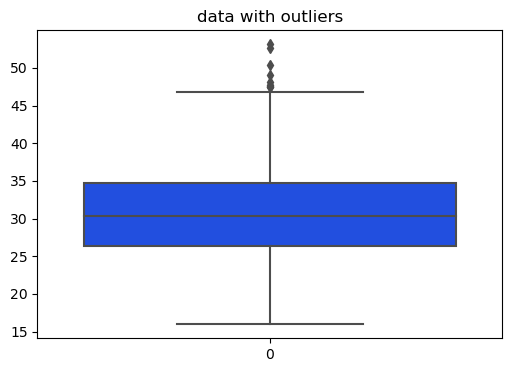

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(insurance['bmi'])
plt.title('data with outliers')
plt.show()

---

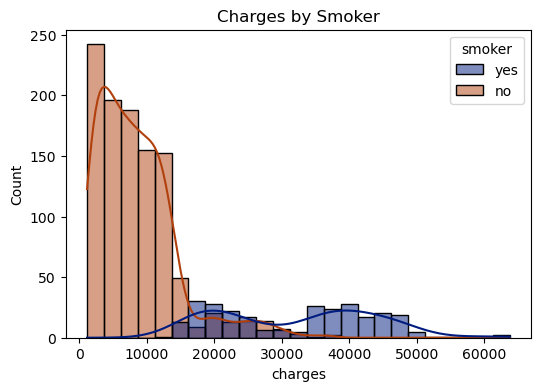

In [33]:
# this part is corrected by chatgpt on this link below 
# https://chatgpt.com/share/67fd8726-c634-8009-b3ee-1fea298abfb4
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the data anyway (always good practice)
insurance_clean = insurance.replace([np.inf, -np.inf], np.nan).dropna(subset=['charges'])

# Suppress specific FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    
    fig, ax1 = plt.subplots(figsize=(6, 4))
    sns.set_palette('dark')
    sns.histplot(data=insurance_clean, x='charges', ax=ax1, bins=25, hue='smoker', kde=True)
    plt.title('Charges by Smoker')
    plt.show()


---
## Methodology

### Requirements:
You should write your code to investigate the following: 
- A  The impact of altering the cost function in linear regression.  
        As you should write your own linear regression model and gradient descent code, you will compare the different reported cost functions:

   -  $ J(\theta) = \frac{1}{2} \sum_{i=1}^{m} \left( y^{(i)} - h_\theta(x^{(i)}) \right)^2 $
   -  $ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y^{(i)} - h_\theta(x^{(i)}) \right)^2 $


-  The impact of learning rate on the training process 
Try the learning rates ( $\alpha$) listed below, plot the value of $ J(\theta)$ after each 
iteration and compare these plots and comment on them.

      $\alpha$ = {0.0001, 0.001, 0.01, 0.1, 1, 10, 100} 
-  Your linear regression model vs sklearn 
Compare your best model's performance with sklearn

- Regularized linear regression  
Implement one of the regularization techniques on your linear regression 
model 
-  Compare your results with any other regressor of your choice (You can use a 
library regressor in this part)

- Use a polynomial regression of any degree/transformation you choose. 
- Discuss the performance with your model and sklearn in C). 

### Linear regression model and gradient descent code

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Hypothesis function
def predict(X, theta):
    return X @ theta

def cost_function_1(X, y, theta):
    m = len(y)
    error = predict(X, theta) - y
    return (0.5) * np.sum(error ** 2)

# Cost Function 2: With 1/m
def cost_function_2(X, y, theta):
    m = len(y)
    error = predict(X, theta) - y
    return (1 / (2 * m)) * np.sum(error ** 2)


# Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations, cost_fn):
    cost_history = []
    m = len(y)

    for i in range(iterations):
        error = predict(X, theta) - y 
        gradient = X.T @ error # Vectorized Gradient 
        if cost_fn == 1:
            gradient = gradient / m 
            theta -= alpha * gradient
            # the derivative for cost fun1 is not divided by m like the cost fun2
            # i think this is cause this erorr
            #C:\Users\zohoo\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:88: 
            # RuntimeWarning: overflow encountered in reduce return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
            # C:\Users\zohoo\AppData\Local\Temp\ipykernel_18424\16300970.py:13: RuntimeWarning: overflow encountered in square
            #   return (0.5) * np.sum(error ** 2) 
            # i try a lot of solutions like Scale X but nothing work ; i figure out is just need to divide by m but because the the derivative is 
            # 
        else:
            gradient = gradient / m 
            theta -= alpha * gradient
        # Compute cost using selected cost function
        cost = cost_function_1(X, y, theta) if cost_fn == 1 else cost_function_2(X, y, theta)

        # Stop if cost diverges
        if np.isnan(cost) or np.isinf(cost):
            print(f"Stopped early at iteration {i}, alpha={alpha} due to overflow.")
            break

        cost_history.append(cost)

    return theta, cost_history

# Extract features and labels
X = insurance_dum[['age', 'bmi', 'smoker_yes']].values.astype(float)
y = insurance_dum['charges'].values.reshape(-1, 1).astype(float)

# Scale X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split before adding bias term!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Add bias term to both sets
X_train_b = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_b = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
theta_init = np.zeros((X_train_b.shape[1], 1), dtype=float)


# Learning rates to try
alphas = [0.0001, 0.001, 0.01, 0.1, 1] # Learning rates with 10, 100 doesn't work for me (overflow encountered erorr) 
# so i just keep [0.0001, 0.001, 0.01, 0.1, 1] in my experiments 
iterations = 100



### Plot Training vs Testing Costs

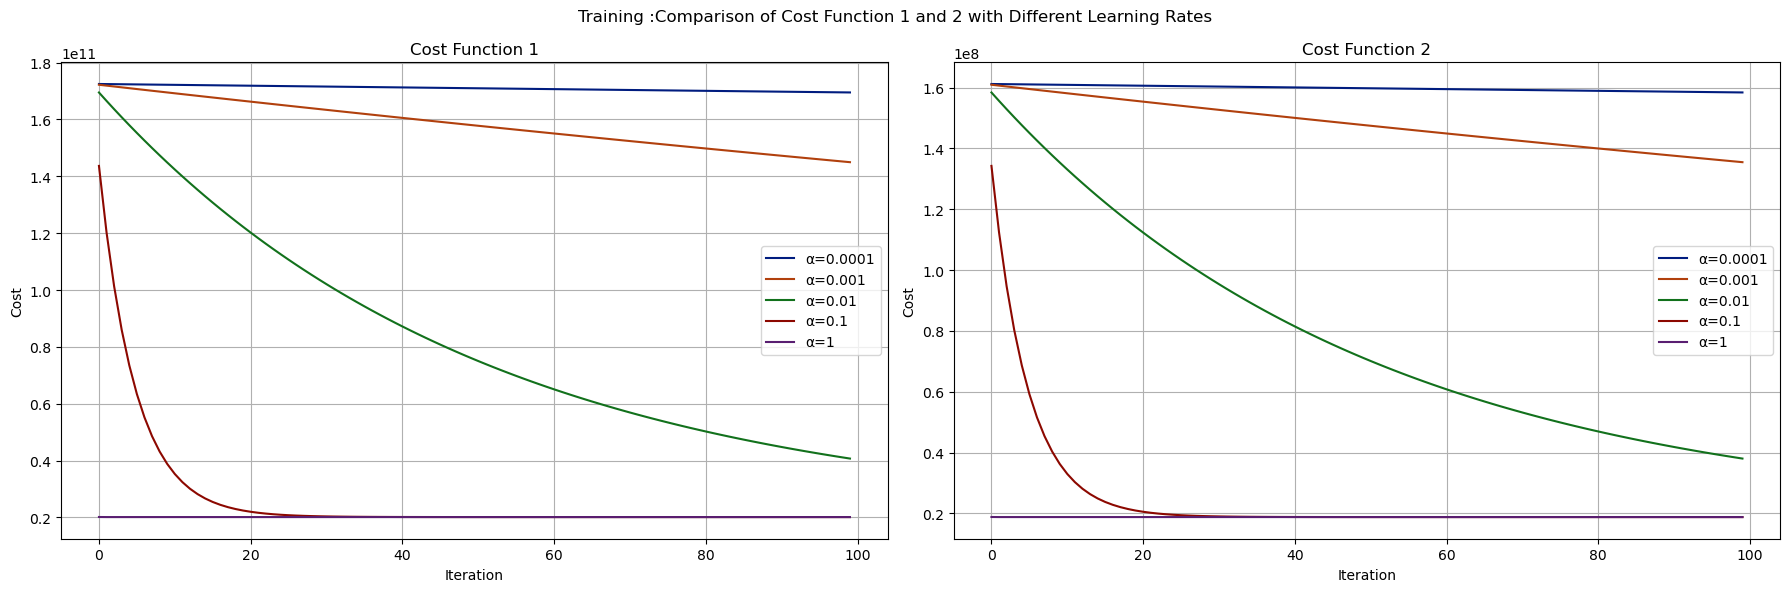

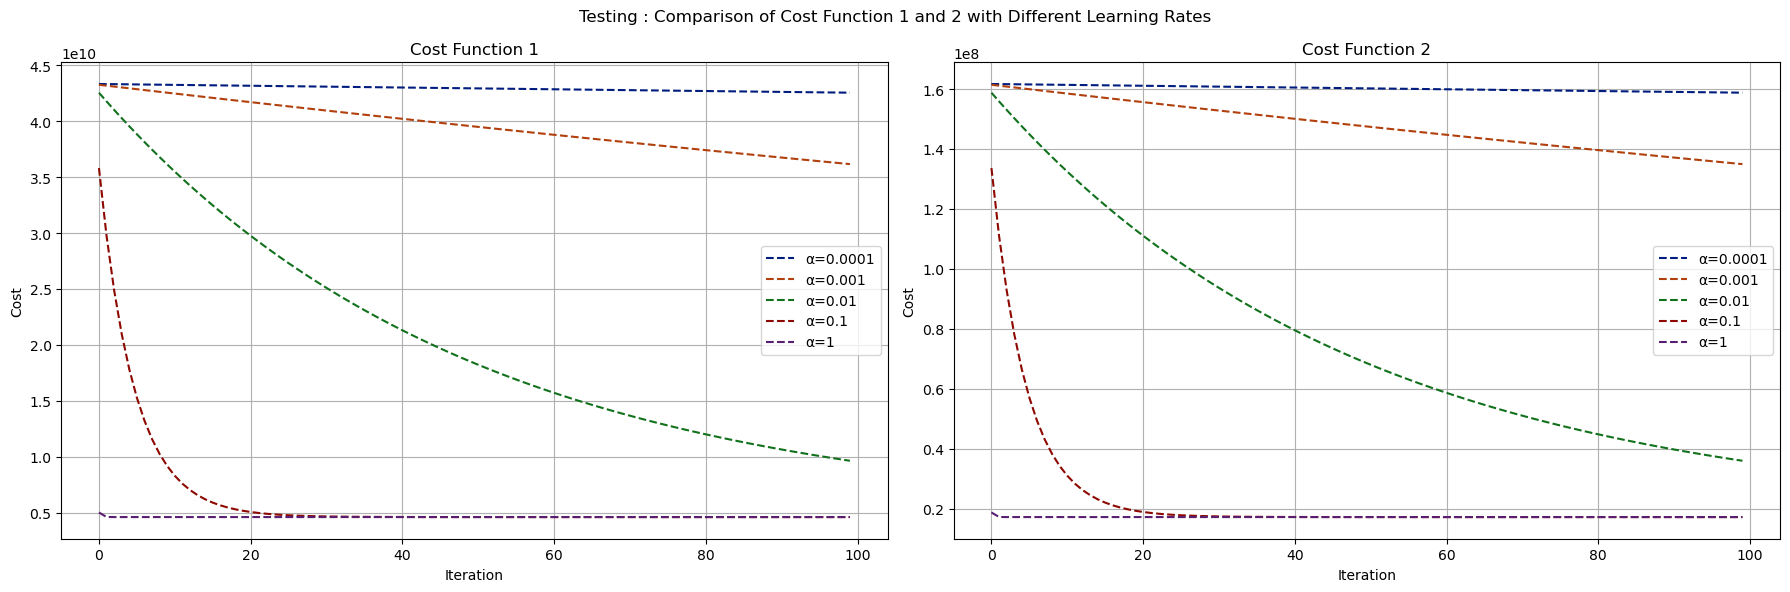

In [39]:

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

for cost_fn, ax in zip([1, 2], axs):
    train_costs = []
    test_costs = []
    m = len(y_train)
    for alpha in alphas:
        theta_final, cost_hist = gradient_descent(X_train_b, y_train, theta_init.copy(), alpha, iterations, cost_fn=cost_fn)
        
        # Plot cost history
        if len(cost_hist) > 0:
            
            ax.plot(range(len(cost_hist)), cost_hist, label=f'α={alpha}')

   
    ax.set_title(f'Cost Function {cost_fn}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    ax.grid(True)
    ax.legend()

plt.suptitle('Training :Comparison of Cost Function 1 and 2 with Different Learning Rates')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

for cost_fn, ax in zip([1, 2], axs):
    m = len(y_test)
    for alpha in alphas:
        theta_final_test, cost_hist = gradient_descent(X_test_b, y_test, theta_init.copy(), alpha, iterations, cost_fn=cost_fn)
        
        # Plot cost history
        if len(cost_hist) > 0:
            ax.plot(range(len(cost_hist)), cost_hist, label=f'α={alpha}', linestyle='--')

    
    ax.set_title(f'Cost Function {cost_fn}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    ax.grid(True)
    ax.legend()

plt.suptitle('Testing : Comparison of Cost Function 1 and 2 with Different Learning Rates')
plt.tight_layout()
plt.show()



### Model Predictions:

Custom Linear - MSE: 37638069.17025345  R2: 0.7392286795956207


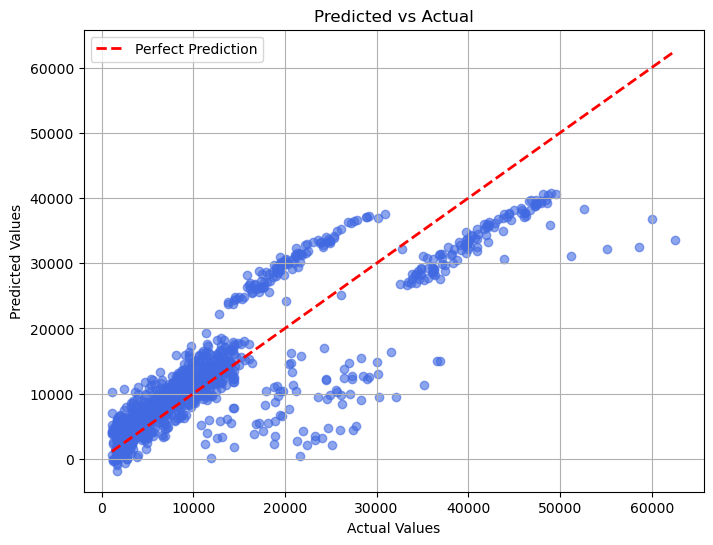

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_custom = X_train_b.dot(theta_final)

alpha = 0.0001  # Smaller step size for complex models

mse = mean_squared_error(y_train, y_pred_custom)
r2 = r2_score(y_train, y_pred_custom)

print("Custom Linear - MSE:", mse, " R2:", r2)

import matplotlib.pyplot as plt

# Flatten predictions and actual values if they are column vectors
y_pred_flat = y_pred_custom.flatten()
y_actual_flat = y_train.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_actual_flat, y_pred_flat, alpha=0.6, color='royalblue')
plt.plot([y_actual_flat.min(), y_actual_flat.max()],
         [y_actual_flat.min(), y_actual_flat.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

### Custom Model VS. Sklearn Model:

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


y_pred_custom_test = X_test_b.dot(theta_final)

# Train sklearn model
lin_reg = LinearRegression()
lin_reg.fit(X_train_b, y_train)
y_pred_sklearn = lin_reg.predict(X_test_b)

# Evaluation
mse_custom = mean_squared_error(y_test, y_pred_custom_test)
r2_custom = r2_score(y_test, y_pred_custom_test)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("Custom Model - MSE:", mse_custom, " R2:", r2_custom)
print("Sklearn Model - MSE:", mse_sklearn, " R2:", r2_sklearn)


Custom Model - MSE: 34512843.8802279  R2: 0.7776932310583374
Sklearn Model - MSE: 34512843.8802279  R2: 0.7776932310583374


### Add Regularization (Ridge)
Modify Gradient Descent to Include Regularization:

In [45]:
def gradient_descent_ridge(X, y, theta, alpha, num_iters, lambda_):
    m = len(y)
    cost_history = []

    for _ in range(num_iters):
        y_pred = X.dot(theta)
        error = y_pred - y

        # Gradient with L2 penalty (don't regularize the intercept term theta[0])
        gradients = (1 / m) * X.T.dot(error)
        gradients[1:] += (lambda_ / m) * theta[1:]

        theta -= alpha * gradients
        cost = (1 / (2 * m)) * np.sum(error**2) + (lambda_ / (2 * m)) * np.sum(theta[1:]**2)
        cost_history.append(cost)

    return theta, cost_history


In [46]:
import numpy as np

# Prepare features and target
X = insurance_dum[['age', 'bmi', 'smoker_yes']].values.astype(float)
y = insurance_dum['charges'].values.reshape(-1, 1).astype(float)

# Add bias (intercept) column
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize theta with zeros
theta = np.zeros((X_b.shape[1], 1))  # shape: (n+1, 1)

alpha = 0.01           # Learning rate
iterations = 1000      # Number of gradient descent steps

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Don't scale the bias later

# Add bias (intercept) column manually
X_b = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])



In [47]:
lambda_ = 10  # Regularization strength
theta_ridge, cost_history_ridge = gradient_descent_ridge(X_b, y, theta.copy(), alpha, iterations, lambda_)
y_pred_ridge = X_b.dot(theta_ridge)

mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)
print("Custom Ridge - MSE:", mse_ridge, " R2:", r2_ridge)


Custom Ridge - MSE: 37011511.86475009  R2: 0.74743542277551


### Compare with sklearn Ridge and Another Model


In [49]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Ridge from sklearn
ridge = Ridge(alpha=lambda_)
ridge.fit(X, y)
y_pred_ridge_sk = ridge.predict(X)

mse_ridge_sk = mean_squared_error(y, y_pred_ridge_sk)
r2_ridge_sk = r2_score(y, y_pred_ridge_sk)

# Try Random Forest (or any model)
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y.ravel())
y_pred_rf = rf.predict(X)

mse_rf = mean_squared_error(y, y_pred_rf)
r2_rf = r2_score(y, y_pred_rf)

print("Sklearn Ridge - MSE:", mse_ridge_sk, " R2:", r2_ridge_sk)
print("Random Forest - MSE:", mse_rf, " R2:", r2_rf)


Sklearn Ridge - MSE: 37183476.43202295  R2: 0.7462619457668005
Random Forest - MSE: 4315273.094122821  R2: 0.9705528072290568


### Add Polynomial Features

Custom Polynomial - MSE: 22408141.13135075  R2: 0.8470880435279803


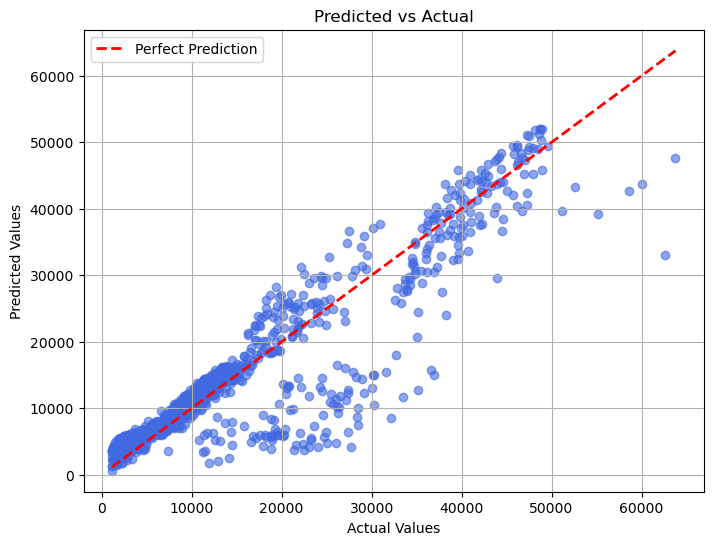

In [51]:

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Standardize original features first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


poly = PolynomialFeatures(degree=4, include_bias=False)# Custom Polynomial: her i just change the degree to get best profermance and deg 4 give me the best performance as i want
# i don't now if this important or not, but i will share my experiments , when i ran this code some time give me bad performance 
# but each time i restart the kernel and run it again that give me best performance as below , but after lots of running time the performance get worse 
#      Model              MSE           R² Score
# 5   Custom Polynomial  2.240814e+07  0.847088
# 6  Sklearn Polynomial  2.360888e+07  0.838894
# and this is my result if i run it again ; it is get worse ( Custom Polynomial); but Sklearn Polynomial always still the same(i doesn't now the reason)
#      Model              MSE           R² Score
# 5   Custom Polynomial  5.638472e+07  0.615234
# 6  Sklearn Polynomial  2.360888e+07  0.838894
X_poly = poly.fit_transform(X_scaled)

# Add bias (intercept term)
X_poly_b = np.hstack([np.ones((X_poly.shape[0], 1)), X_poly])

# Reinitialize theta
theta_poly = np.zeros((X_poly_b.shape[1], 1))

# Run gradient descent on polynomial features
theta_poly_final, cost_history_poly = gradient_descent(X_poly_b, y, theta_poly, alpha, iterations,cost_fn=2)
y_pred_poly = X_poly_b.dot(theta_poly_final)

alpha = 0.0001  # Smaller step size for complex models
theta_poly = np.zeros((X_poly_b.shape[1], 1))

mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print("Custom Polynomial - MSE:", mse_poly, " R2:", r2_poly)

import matplotlib.pyplot as plt

# Flatten predictions and actual values if they are column vectors
y_pred_flat = y_pred_poly.flatten()
y_actual_flat = y.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_actual_flat, y_pred_flat, alpha=0.6, color='royalblue')
plt.plot([y_actual_flat.min(), y_actual_flat.max()],
         [y_actual_flat.min(), y_actual_flat.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
from sklearn.pipeline import make_pipeline

model_poly_sk = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_poly_sk.fit(X, y)
y_pred_poly_sk = model_poly_sk.predict(X)

mse_poly_sk = mean_squared_error(y, y_pred_poly_sk)
r2_poly_sk = r2_score(y, y_pred_poly_sk)

print("Sklearn Polynomial - MSE:", mse_poly_sk, " R2:", r2_poly_sk)


Sklearn Polynomial - MSE: 23608879.91702428  R2: 0.8388942662818929


In [53]:
import pandas as pd

results = pd.DataFrame({
    'Model': [
        'Custom Linear',
        'Sklearn Linear',
        'Custom Ridge',
        'Sklearn Ridge',
        'Random Forest',
        'Custom Polynomial',
        'Sklearn Polynomial'
    ],
    'MSE': [
        mse_custom,
        mse_sklearn,
        mse_ridge,
        mse_ridge_sk,
        mse_rf,
        mse_poly,
        mse_poly_sk
    ],
    'R² Score': [
        r2_custom,
        r2_sklearn,
        r2_ridge,
        r2_ridge_sk,
        r2_rf,
        r2_poly,
        r2_poly_sk
    ]
})

print(results)


                Model           MSE  R² Score
0       Custom Linear  3.451284e+07  0.777693
1      Sklearn Linear  3.451284e+07  0.777693
2        Custom Ridge  3.701151e+07  0.747435
3       Sklearn Ridge  3.718348e+07  0.746262
4       Random Forest  4.315273e+06  0.970553
5   Custom Polynomial  2.240814e+07  0.847088
6  Sklearn Polynomial  2.360888e+07  0.838894


## References:
- [1] https://www.kaggle.com/code/narminhumbatli/medical-cost-personal-datasets-data-visualization
- [2] https://www.kaggle.com/code/mragpavank/medical-cost-personal-datasets/notebook
- [3] https://www.kaggle.com/datasets/mirichoi0218/insurance
- [4] https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/